In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    return (1.0 / (2.0 * len(y))) * sum((y - tx.dot(w))**2)

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for j in range(len(w1)):
        for i in range(len(w0)):
            losses[i][j] = compute_loss(y, tx, [w0[i], w1[j]])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609557, w0*=72.72727272727272, w1*=13.636363636363626, execution time=6.364 seconds


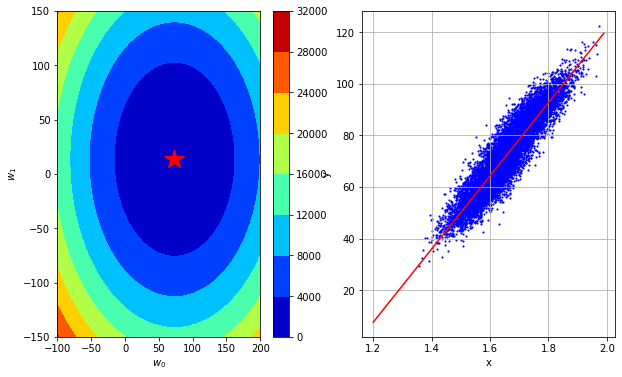

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    
    return - (1.0 / len(y)) * tx.T.dot(y - tx.dot(w))

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/199): loss=2792.2367127591647, w0=7.32939220021052, w1=1.3479712434988933
Gradient Descent(1/199): loss=2264.635056029997, w0=13.925845180399985, w1=2.5611453626479004
Gradient Descent(2/199): loss=1837.2777140793678, w0=19.862652862570503, w1=3.6530020698820063
Gradient Descent(3/199): loss=1491.1182670993771, w0=25.20577977652397, w1=4.635673106392703
Gradient Descent(4/199): loss=1210.7291150455767, w0=30.01459399908209, w1=5.520077039252333
Gradient Descent(5/199): loss=983.6139018819906, w0=34.3425267993844, w1=6.316040578826
Gradient Descent(6/199): loss=799.6505792194939, w0=38.23766631965648, w1=7.0324077644423
Gradient Descent(7/199): loss=650.6402878628635, w0=41.74329188790135, w1=7.677138231496971
Gradient Descent(8/199): loss=529.941951863997, w0=44.89835489932173, w1=8.257395651846172
Gradient Descent(9/199): loss=432.1762997049171, w0=47.737911609600076, w1=8.779627330160459
Gradient Descent(10/199): loss=352.9861214560585, w0=50.29351264885059, w1=9.2

Gradient Descent(109/199): loss=15.385888162878407, w0=73.29324319871918, w1=13.479587594153772
Gradient Descent(110/199): loss=15.385888107009011, w0=73.29331107905779, w1=13.479600078237299
Gradient Descent(111/199): loss=15.38588806175486, w0=73.29337217136252, w1=13.479611313912473
Gradient Descent(112/199): loss=15.385888025099092, w0=73.29342715443678, w1=13.479621426020131
Gradient Descent(113/199): loss=15.385887995407769, w0=73.29347663920362, w1=13.479630526917022
Gradient Descent(114/199): loss=15.385887971357931, w0=73.29352117549378, w1=13.479638717724225
Gradient Descent(115/199): loss=15.385887951877441, w0=73.29356125815492, w1=13.479646089450707
Gradient Descent(116/199): loss=15.385887936098388, w0=73.29359733254995, w1=13.479652724004541
Gradient Descent(117/199): loss=15.38588792331723, w0=73.29362979950547, w1=13.479658695102993
Gradient Descent(118/199): loss=15.385887912964586, w0=73.29365901976544, w1=13.479664069091598
Gradient Descent(119/199): loss=15.3858879

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    gradient = 0
    i = 0
    for new_y, new_tx in batch_iter(y, tx, 10):
        gradient += compute_gradient(new_y, new_tx, w)
        i += 1
    return gradient / i
        
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_stoch_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591647, w0=51.16313011976119, w1=10.056773513349945
Gradient Descent(1/49): loss=266.1301179692777, w0=64.45846945038383, w1=10.711758132675019
Gradient Descent(2/49): loss=58.249284275538486, w0=71.60672325046681, w1=15.092990734376354
Gradient Descent(3/49): loss=18.11054111823137, w0=71.6635508616588, w1=14.144231183770787
Gradient Descent(4/49): loss=16.935735480370894, w0=72.09517552100513, w1=15.063476264485416
Gradient Descent(5/49): loss=17.358538365614766, w0=73.37647164966936, w1=12.439902860480137
Gradient Descent(6/49): loss=15.929897066606113, w0=74.23472736498978, w1=12.553026436076431
Gradient Descent(7/49): loss=16.25781870453597, w0=72.42013802214395, w1=13.479735257070448
Gradient Descent(8/49): loss=15.767637090908286, w0=72.50890797570098, w1=15.707737243044674
Gradient Descent(9/49): loss=18.17605865231073, w0=72.56529600890416, w1=16.163254904160965
Gradient Descent(10/49): loss=19.252035879738084, w0=73.10797514575764, w1=

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Grid Search: loss*=71.12701961084933, w0*=71.42857142857142, w1*=9.183673469387742, execution time=0.074 seconds


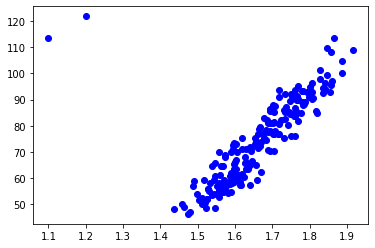

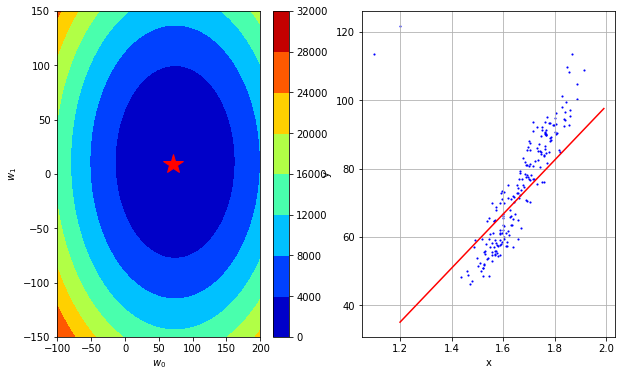

In [14]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.plot(height, weight, 'bo')

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)


### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)